In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooltools
import cooler

/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_asymmetric(x, max_iter=10

In [4]:
clr = cooler.Cooler('/home1/yxiao977/labwork/train_akita/data/5000res_0.5thres_hic.cool')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
total_length = 0
chromstarts = []
chromsizes = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])
    chro_extent_len = clr.extent(i)[1] - clr.extent(i)[0]
    total_length += chro_extent_len * clr.binsize
    chromsizes.append((i, chro_extent_len * clr.binsize))
print(f'total genome length: {total_length}')

chromosomes: ['chr1_pilon', 'chr2_pilon', 'chr3_pilon', 'chr4_pilon', 'chr5_pilon', 'chr6_pilon', 'chr7_pilon', 'chr8_pilon', 'chr9_pilon', 'chr10_pilon', 'chr11_pilon', 'chr12_pilon', 'chr13_pilon', 'chr14_pilon', 'chr15_pilon', 'chr16_pilon', 'chr17_pilon', 'chr18_pilon', 'chr19_pilon', 'chr20_pilon', 'chr21_pilon', 'chr22_pilon', 'chr23_pilon', 'chr24_pilon', 'chr25_pilon', 'chr26_pilon', 'chr27_pilon', 'chr28_pilon', 'chr29_pilon', 'chr30_pilon', 'chr31_pilon', 'chr32_pilon', 'chr33_pilon', 'chr34_pilon', 'chr35_pilon', 'chr36_pilon', 'chr37_pilon', 'chr38_pilon', 'chr39_pilon', 'chr40_pilon', 'chr41_pilon', 'chr42_pilon', 'chr43_pilon', 'chr44_pilon', 'chr45_pilon', 'chr46_pilon', 'chr47_pilon', 'chr48_pilon', 'chr49_pilon', 'chr50_pilon', 'chr51_pilon', 'chr52_pilon', 'chr53_pilon', 'chr54_pilon', 'chr55_pilon', 'chr56_pilon', 'chr57_pilon', 'chr58_pilon', 'chr59_pilon', 'chr60_pilon', 'chr61_pilon', 'chr62_pilon', 'chr63_pilon', 'chr64_pilon', 'chr65_pilon', 'chr66_pilon', 'chr6

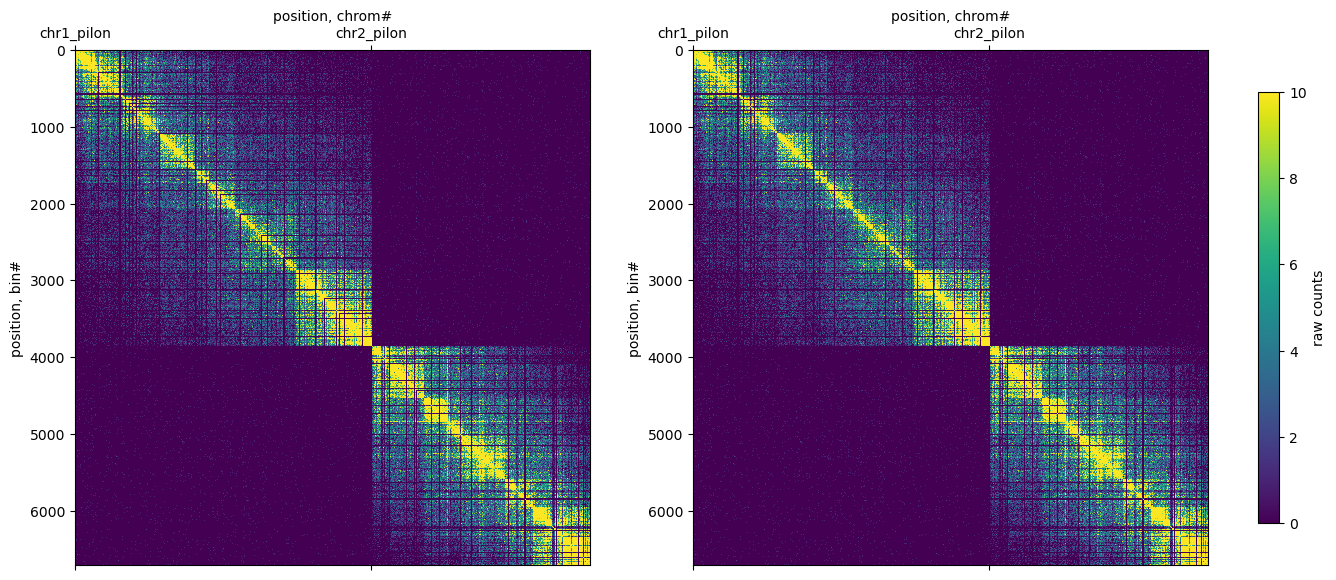

In [8]:
clr = cooler.Cooler('/home1/yxiao977/sc1/train_akita/data/5000res_0.5thres_hic.cool')

f, axs = plt.subplots(1, 2)
im = axs[0].matshow((clr.matrix(balance=False)[:6707, :6707]), vmax=10)
axs[0].set(xticks=chromstarts[:2], xticklabels=clr.chromnames[:2],
       xlabel='position, chrom#', ylabel='position, bin#')
axs[0].xaxis.set_label_position('top')

clr2 = cooler.Cooler('/home1/yxiao977/sc1/train_akita/data/5000res_Dplus_hic.cool')
im = axs[1].matshow((clr2.matrix(balance=False)[:6707, :6707]), vmax=10)
axs[1].set(xticks=chromstarts[:2], xticklabels=clr2.chromnames[:2],
       xlabel='position, chrom#', ylabel='position, bin#')
axs[1].xaxis.set_label_position('top')

f.colorbar(im, fraction=0.046, pad=0.04, label='raw counts', ax=axs, shrink=0.7)
f.set_size_inches(16, 8)

# Visualize Hi-C data with HiGlass

In [ ]:
### Visualize Hi-C data with HiGlass
import higlass as hg
hg.server.enable_proxy()


# Adds a tileset to a background HiGlass server
hic_path = 'data/GSE152150_HiC-Dplus.smic1.1N.mapq_30.1000.mcool'
ts1 = hg.cooler(hic_path)
ts2 = hg.bigwig('data/5000res_bins_cistotal_ratio.bw')
ts3 = hg.cooler('/home1/yxiao977/sc1/train_akita/data/5000res_0.5thres_hic_filter_both_bin.mcool')

ts4 = hg.bigwig('data/5000res_bins_cistotal_ratio_bioframe.bw')
ts5 = hg.bigwig('/home1/yxiao977/sc1/train_akita/data/5000res_bins_cistotal_ratio_balanced.bw')
ts6 = hg.bigwig('/home1/yxiao977/sc1/train_akita/data/5000res_bins_cistotal_ratio_balanced_gf.bw')
ts7 = hg.cooler('/home1/yxiao977/sc1/train_akita/test_data/Multires_test_coverage.mcool')
ts8 = hg.cooler('/home1/yxiao977/sc1/train_akita/data/Multires_0.5thres_hic2.mcool')


In [ ]:
view1 = hg.view(ts1.track("heatmap"), ts1.track("chromosome-labels"), ts6.track("horizontal-bar"))
view2 = hg.view(ts3.track("heatmap"), ts3.track("chromosome-labels"), ts6.track("horizontal-bar"))
view3 = hg.view(ts8.track("heatmap"), ts8.track("chromosome-labels"), ts6.track("horizontal-bar"))

In [ ]:
# Lock zoom & location for each `View`
view_lock = hg.lock(view1, view2)

# Concatenate views horizontally and apply synchronization lock
(view1 | view2).locks(view_lock)

In [ ]:
ts2 = hg.bigwig('data/5000res_bins_cistotal_ratio.bw')
ts3 = hg.cooler('/home1/yxiao977/labwork/train_akita/data/Multires_0.5thres_hic2.mcool')
ts4 = hg.bigwig('data/5000res_bins_cistotal_ratio_bioframe.bw')

view3 = hg.view(ts3.track("chromosome-labels"), ts2.track("horizontal-bar"))
view4 = hg.view(ts3.track("chromosome-labels"), ts5.track("horizontal-bar"))

# Lock zoom & location for each `View`
view_lock = hg.lock(view3, view4)

# Concatenate views horizontally and apply synchronization lock
(view3 | view4).locks(view_lock)